
#**PROBABILITY AND PROBABILITY DISTRIBUTIONS:**

##Notebook of Week 1 of PRA3500: Statistics/Data Analysis for Physicists

#Part 1: Probability Relations

Instructions:

"*Consider a test which looks for COVID-19 antibodies in the
general population. Let’s assume that 1% of our general population has these antibodies. If we can make a test which is 99% sensitive to the antibodies (i.e. we can
tell 99% of cases as true positives, 1% as false negatives) and give 95% true
negative results (5% are accidentally given a positive result) – it looks like we might be doing pretty well.*"

**Task 1**: Use your programming tool of choice and make a small script which accepts
these data as inputs and returns the probability of a positive test indicating
correctly that this person does indeed have the anti-bodies. 

In [51]:
#GIVEN INFORMATION
p=0.01 #true positive (the person really has antibodies)
n=0.99 #true negative (the person really does not have antibodies)
a=0.99 #if a person has antibodies, the probability that it will also test as pozitive 
b=0.95 #if it does not have antibodies, the probability that the person will also test negative

#CALCULATIONS
p_t=p*a + n*(1-b) #test result positive ("a" amount of people with antibodies (p) and "(1-b)"" amount of people without antibodies (n) will test positive)
n_t=n*b + p*(1-a) #test result negative ("b" amount of people without antibodies (n) and "(1-a)"" amount of people with antibodies (p) will test negative)

#Check (error if #calculations are wrong)
def unity(): 
  u=p_t+n_t #should be 1
  if u!=1:
    return(print("Error in calculations. Sum of positive and negative outcomes of the test does not equal the total number of tests taken.")) 
  if u==1:
    pass
unity()

#RESULTS
#probability of a positive test indicating correctly that this person does indeed has the anti-bodies (a_rev)
a_rev=a*p/p_t #Bayes' theorem (explanation can be found in chapter 2 (equation 2.4) of Bohm's Introduction to Statistics and Data Analysis for Physicists)
#probability of a negative test indicating correctly that this person does indeed does not have the anti-bodies (b_rev)
b_rev=b*n/n_t #Bayes' theorem

#PRINT
print("The probability of a positive test indicating correctly that this person does indeed has the anti-bodies is ", a_rev, ".")
print("The probability of a negative test indicating correctly that this person indeed does not have the anti-bodies is ", b_rev, ".")

The probability of a positive test indicating correctly that this person does indeed has the anti-bodies is  0.16666666666666655 .
The probability of a negative test indicating correctly that this person indeed does not have the anti-bodies is  0.9998936848819903 .


**Task 2**: Using the same testing kit, how much higher would the fraction of
people with the antibodies have to be in order to give a >50% chance of the kit
giving a positive result? It might be nice to make a graph of this.

Graph will be made in 2 ways: firstly, using as little hand calculations as possible. That way k (percent of population with antbodies) will be discretely increasing in small amounts, and the accuracy od the result k will depend on how small these increasing amounts are (the smaller the better).The second approach consisted of a small hand calculation to obtain the expression for a function "test turning out positive" which explicitly depends on k. This is slightly easier to code, and the code runs a bit quicker, which is noticable on slow laptops. It is also easier to read off what the value of k must be for test turning out positive in 50% of cases.

In [0]:
#IMPORTS
import matplotlib.pyplot as plt  #import library
import numpy as np

#make a function that draws graphs
def simple_graph(independent_variable, dependent_variable):
  plt.plot(k_array, p_t_1) #make graph
  plt.xlabel('percent of people with antibodies')  #name axis
  plt.ylabel('percent of people tested positive') #name axis 
  plt.grid() #add grid so it's easier to read off the results
  plt.title('Percent of people testing positive depending on the percent of people having antibodies') #give title
  plt.show() #show graph

When at least about  47.87  percent of population will have antibodies, test will give positive result in 50% of cases.


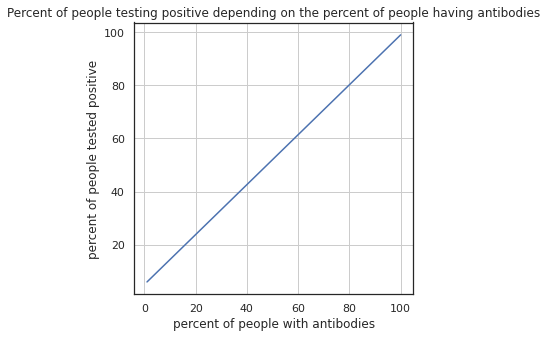

In [53]:
#IMPLICIT WAY OF MAKING GRAPH (as little hand calculations as possible)
#create arrays of the function p_t_1 (test turning out positive) and the variable k (corresponds to the percent of people with antibodies)
p_t_1 = []
k_array = []
count = 0
for k in np.arange(1, 100, 0.005): #k is slowly increasing 
  k_array.append(k)
  p_1=p*k #true positive (the person really has antibodies; variable)
  n_1=1-k*p #true negative (the person really does not have antibodies; obtained based on p_1 expression in terms of k)
  p_t_1.append((p_1*a + n_1*(1-b))*100) #recalculate positive results, with k free parameter
  if 50<p_t_1[count]<50.005:
    print("When at least about ", round(k, 2), " percent of population will have antibodies, test will give positive result in 50% of cases.")
  count+=1
simple_graph(k_array, p_t_1)

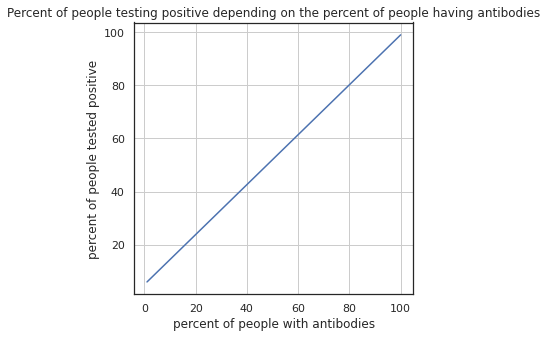

When  47.87 % of population will have antibodies, the test will turn out to be positive in 1/2 cases.


In [54]:
#EXPLICIT WAY OF MAKING GRAPH (small calculation by hand, handy outcomes; y=p_t_1)
y = []
for k in k_array:
  y.append(0.0094*k+0.05)
simple_graph(k_array, y)

#Calculating k explicitly
k=round(((0.5-0.05)/0.0094), 2)
print("When ", k, "% of population will have antibodies, the test will turn out to be positive in 1/2 cases.")

###Interpretation of results: Task 1

The results show that the probability of a positive test indicating correctly that a person does indeed have the anti-bodies is just below 17%. From this we can conclude that the positive outcomes of the test are not to be blindly trusted (most probably that person does not have antibodies, despite the test showing otherwise). On the other hand, if the results of the test are negative, we can be very sure that they are correct. Within the precision of the data given in the task, we can even be sure with 100% certainty that if the results of the test be negative, the person does not have antibodies. 

If this was a real-world situaton, I would recommend that in case of a test coming out as positive, multiple (or alternative) tests be repeated/performed on that person, as the positive result is clearly not a good indicator of the presence of antibodies. Just about 1 in 6 people testing positive would actually have antibodies. If I had limited resources (as one does in real-life) I would on the other hand not repeat tests on cases that turned out negative, as those results clearly are much more accurate.

###Interpretation of Part 2

weciqjdljqlejqli

# Part 2: Probability Distributions

Task 1: Make a script to generate a discrete distribution, with values in the integer
bins. The script should be able to generate a Gaussian, Bionomial, Poisson and an
Exponential distribution – it should always use the same range of values to do so
(i.e. the x-axis should run from 0 to 10 for example).

Task 2: Choose one of the distributions from the task above and make it into a
continuous distribution. You may have to bin it into a histogram to be able to plot
it.

In [0]:
# IMPORT STATEMENTS FOR LIBRARIES

%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")

In [0]:
#IMPORT STATEMENTS FOR DIFFERENT DISTRIBUTIONS

mysize=1000

from scipy.stats import norm
data_normal = norm.rvs(size=mysize,loc=5,scale=1)

from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=mysize)

from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3.5, size=mysize)

from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.48,size=mysize)

In [0]:
#DEFINING FUNCTIONS FOR DISCRETE AND CONTINUOUS DISTRIBUTIONS

#discrete distribution
def plot_graph(which_data, x_axis): #for x_axis write the type of distribution as a string
  ax = sns.distplot(which_data,
                  bins=10,
                  norm_hist=True,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel=x_axis, ylabel="probability", xlim=(0,10))

#continuous distribution
def plot_continuous(which_data, x_axis): #for x_axis write the type of distribution as a string
  bx = sns.distplot(which_data,
                bins=10,
                hist=False,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth": 15,'alpha':1})
  bx.set(xlabel=x_axis, ylabel='probability', xlim=(0,10))

Below normalised graphs for the gaussian, exponential, poisson and binomial distributions will be generated respectively. For each type of distribution, firstly dicrete and secondly continuous graph will be plotted.

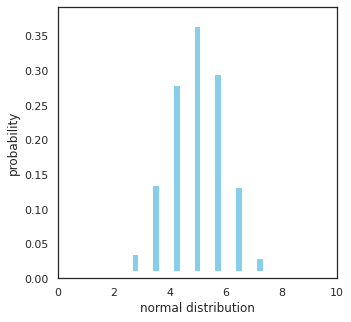

In [58]:
plot_graph(data_normal, "normal distribution")

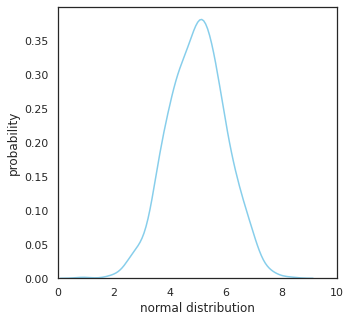

In [59]:
plot_continuous(data_normal, "normal distribution")

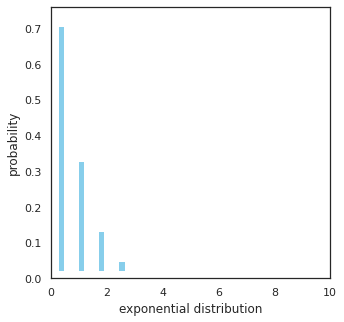

In [60]:
plot_graph(data_expon, "exponential distribution")

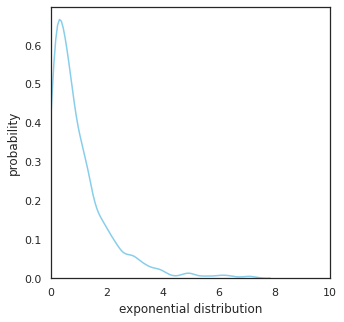

In [61]:
plot_continuous(data_expon, "exponential distribution")

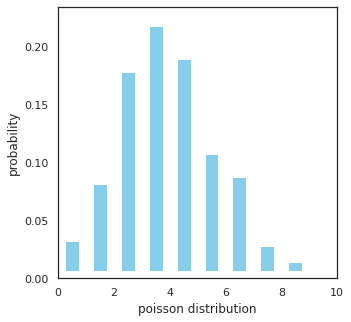

In [62]:
plot_graph(data_poisson, "poisson distribution")

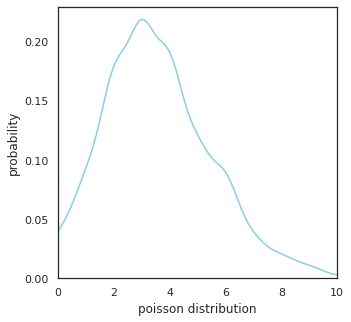

In [63]:
plot_continuous(data_poisson, "poisson distribution")

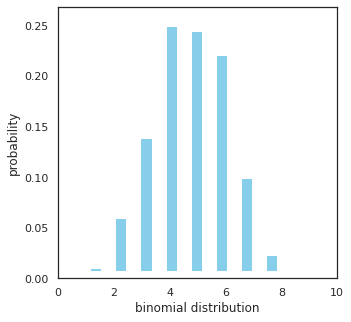

In [64]:
plot_graph(data_binom, "binomial distribution") 

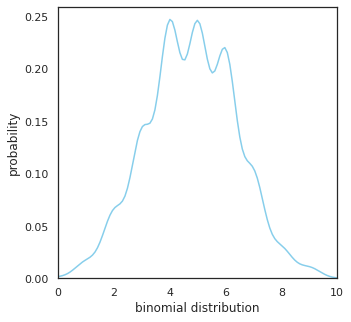

In [65]:
plot_continuous(data_binom, "binomial distribution")

Follow up task: Modify your script to accept two values and return the sum of the
probability distribution function between those values (e.g. so I could ask for the
total of the exponential distribution between 0 and 2 for example)

In [66]:
def discrete_integral(give_your_distribution_name_string, data_type, lower_boundary, higher_boundary):
  hist,bins = np.histogram(data_type,bins = [lower_boundary, higher_boundary])
  y=sum(hist)/mysize #what portion of events take place in this region
  
  print("Chosen distribution: ", give_your_distribution_name_string)
  print("Chosen range:  ", bins) 
  print("Number of events in that chosen range: ", hist) 
  print("Probability of finding an event in your chosen range is: ", y)
  print("""
  """)


#YOU ARE WELCOME TO MODIFY BOUNDARIES AT YOUR WILL (if you go outside range [0,10] probability will be 0)
discrete_integral("Normal Distribution", data_normal, 0, 10)
discrete_integral("Exponential Distribution", data_expon, 0, 10)
discrete_integral("Binomial Distribution", data_binom, 0, 10)
discrete_integral("Poisson Distribution", data_poisson, 0, 10)

Chosen distribution:  Normal Distribution
Chosen range:   [ 0 10]
Number of events in that chosen range:  [1000]
Probability of finding an event in your chosen range is:  1.0

  
Chosen distribution:  Exponential Distribution
Chosen range:   [ 0 10]
Number of events in that chosen range:  [1000]
Probability of finding an event in your chosen range is:  1.0

  
Chosen distribution:  Binomial Distribution
Chosen range:   [ 0 10]
Number of events in that chosen range:  [1000]
Probability of finding an event in your chosen range is:  1.0

  
Chosen distribution:  Poisson Distribution
Chosen range:   [ 0 10]
Number of events in that chosen range:  [1000]
Probability of finding an event in your chosen range is:  1.0

  


###Interpretation 

hwekdqiil

#Part 3: Expectation values


Choose one of your discrete distributions and one of your continuous
distributions from the previous task. Write a small script to take the data from the
histogram and turn it into an expectation value.

In [0]:
#DISCRETE DISTRIBUTIONS

def discrete_expectation(name_your_distribution_string, data_type, total_number_of_events):
  hist,bins = np.histogram(data_type, bins=[0,1,2,3,4,5,6,7,8,9,10])
  print("bins have the following boundaries: ",bins)
  print("number of events in each bin: ", hist)

  #make number of events a list, where the first element means the number of events in bin 1, ...
  events=[]
  for i in hist:
    events.append(i) 

  #calculate expectation value by multiplying the number of bin and the probability of finding an event in that bin (number of events in that bin/total number of events) and sum everything
  y=[]
  for i in range(9):
    y.append(events[i]*(i+1)/total_number_of_events)
  expectation=sum(y)
  print("Expectation value for a discrete ", name_your_distribution_string , " : ", round(expectation,2))

#calculate average of your distribution
def simple_average(data_type):
  y=sum(data_type)/len(data_type)
  print(y)

#define function for continuous expectation value
def continuous_expectation(data_type, data):
  u=[]
  f=[]
  integrand=[]
  for i in range(mysize):
    u=u.append(data_type[i])
    f=f.append(data[i])
  for j in range(mysize):
    integrand.append(u[j]*f[j])
  y=sum(integrand)
  print(y)


In [0]:
#define function for continuous expectation value
def continuous_expectation(data_type, data):
  u=[]
  f=[]
  integrand=[]
  for i in range(mysize):
    u=u.append(data_type[i])
    f=f.append(data[i])
  for j in range(mysize):
    integrand.append(u[j]*f[j])
  y=sum(integrand)
  print(y)

In [77]:
discrete_expectation("exponential distribution", data_expon, mysize)
discrete_expectation("normal distribution", data_normal, mysize)
discrete_expectation("binomial distribution", data_binom, mysize)
discrete_expectation("poisson distribution", data_poisson, mysize)

simple_average(data_expon)
simple_average(data_normal)
simple_average(data_binom)
simple_average(data_poisson)


bins have the following boundaries:  [ 0  1  2  3  4  5  6  7  8  9 10]
number of events in each bin:  [630 231  81  34  10   6   6   2   0   0]
Expectation value for a discrete  exponential distribution  :  1.62
bins have the following boundaries:  [ 0  1  2  3  4  5  6  7  8  9 10]
number of events in each bin:  [  1   1  25 146 321 353 133  19   1   0]
Expectation value for a discrete  normal distribution  :  5.48
bins have the following boundaries:  [ 0  1  2  3  4  5  6  7  8  9 10]
number of events in each bin:  [  1  15  60 131 230 226 205  95  27  10]
Expectation value for a discrete  binomial distribution  :  5.68
bins have the following boundaries:  [ 0  1  2  3  4  5  6  7  8  9 10]
number of events in each bin:  [ 38  87 184 223 195 113  93  34  20  13]
Expectation value for a discrete  poisson distribution  :  4.41
1.0270446225912624
4.976829683482236
4.779
3.544


In [70]:
#test
mydata=[0,1,2,2,3,3,3,4,4,4,4, 5,5,5,5,5, 6,6,6,6,7,7,7,8,8,9,10]
print(len(mydata))
print(sum(mydata))
exp=sum(mydata)/len(mydata)
print("easy: ",exp)
discrete_expectation("check function", mydata, len(mydata))
simple_average(mydata)

27
135
easy:  5.0
bins have the following boundaries:  [ 0  1  2  3  4  5  6  7  8  9 10]
number of events in each bin:  [1 1 2 3 4 5 4 3 2 2]
Expectation value for a discrete  check function  :  5.22
5.0


In [0]:
#CONTINUOUS DISTRIBUTIONS

###Interpretation of task 1

blablabalhssxdilcuilvuieruifheruiohe

Expectation values are also useful in understanding how game
shows work. Make a small game, which simulates the TV show deal or no deal.
There are 20 boxes (numbered 1-20). The contestant chooses one box to keep and
then opens 3 at random and gets to know the values of these boxes. What is the
expected value of the prize they go home with? They have 1 box out of 17
remaining. Make it simple – the three random boxes don’t have to be chosen by the
user – simply chosen at random from the possibilities.

In [72]:
#to see intermediate steps of the game, uncomment everything
#please read the illuminating output; 'expectation value' is really not the most likely value, but purely an average. Naming is very misleading.

import random
import statistics
boxes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#print(boxes)
original_box=random.choice(boxes)
#print(original_box)
boxes.remove(original_box)
#print(boxes)
box_1=random.choice(boxes)
#print(box_1)
boxes.remove(box_1)
#print(boxes)
box_2=random.choice(boxes)
#print(box_2)
boxes.remove(box_2)
#print(boxes)
box_3=random.choice(boxes)
#print(box_3)
boxes.remove(box_3)
#print(boxes)
boxes.append(original_box)
#print(boxes)
def expectation_value(decimal):
  y=statistics.mean(boxes) #in this particular case expectation value equals the mean (discrete dataset)
  return round(y, decimal)
#print(expectation_value(2))
print("God knows that the contestant put aside box with value ", original_box, 
      ". Then, as the whole show knows, the contestant picked 3 boxes with values ", 
      box_1, ", ", box_2, " and ", box_3,  " respectively. The expectation value of the 17 unopened boxes is ", 
      expectation_value(2), ". However, ", expectation_value(0), 
      " is not the most likely value that's hidden in the unopened box, but purely an average of the remaining boxes." 
      "The numbers close to the mean have in this distribution really nothing to do with how likely one is to pick such a value."
      " Naming 'expectation value' is unfortunately very misleding.")

God knows that the contestant put aside box with value  3 . Then, as the whole show knows, the contestant picked 3 boxes with values  7 ,  1  and  11  respectively. The expectation value of the 17 unopened boxes is  11.24 . However,  11.0  is not the most likely value that's hidden in the unopened box, but purely an average of the remaining boxes.The numbers close to the mean have in this distribution really nothing to do with how likely one is to pick such a value. Naming 'expectation value' is unfortunately very misleding.


###Interpretation of task 2

baksdlwieufqeuifqepfuipquie

#Part 3: Messy real world

Take your script which outputs your distribution and have it print the expectation
value, the mean value, the variance, skewness and kurtosis. 

In [0]:
import scipy.stats
from scipy.stats import norm, poisson, binom, expon, skew, kurtosis

#good programmer is a lazy programmer
#use statistics package to get information about your distributions
def LazyRealWorld(name_your_distribution_string, data_type):

  print(name_your_distribution_string)
  print("mean: {}" .format(np.mean(data_type)))
  print("expectation value: {}")
  print("variance: {}" .format(np.var(data_type)))
  print("skewness: {}" .format(skew(data_type)))
  print("kurtosis: {}" .format(kurtosis(data_type)))
  print("""
  """)

In [74]:
def blabla(data_type):
  print(norm.pdf(data_type))
  print(norm.expect(data_type, lb = -10**(10), ub = 10**(10)))

blabla(data_expon)

[2.94156862e-01 3.98817609e-01 4.32021802e-02 2.84856525e-01
 3.98925358e-01 1.78675619e-01 3.98645170e-01 3.95756234e-01
 2.37450797e-09 3.98640367e-01 2.18169611e-01 2.65949304e-01
 3.75070500e-01 3.98679325e-01 2.12719584e-01 1.99022635e-01
 3.20210136e-01 8.25422827e-02 2.36941381e-01 2.42536536e-01
 3.71471221e-01 3.93541807e-01 6.12058052e-02 1.45129676e-01
 3.82912799e-01 3.64024860e-01 1.07366151e-01 1.16915965e-01
 1.93357414e-01 3.67497698e-01 3.09001979e-01 7.36215939e-03
 2.26336808e-01 1.55905731e-01 4.10920102e-02 3.98924448e-01
 3.81664348e-01 3.98672112e-01 3.67809368e-01 3.78867255e-01
 6.78685992e-02 3.98385710e-01 1.49747855e-01 3.98165457e-01
 3.23246800e-01 2.40911493e-01 3.98873278e-01 3.69168936e-01
 1.42423779e-01 3.12795616e-01 4.79211689e-02 3.85239316e-01
 2.63400456e-01 3.23691489e-01 6.61709945e-02 2.15502356e-03
 3.98690358e-01 3.83338838e-01 3.54401118e-01 3.91756493e-01
 2.33318665e-02 9.60324332e-02 6.99088438e-02 3.30651206e-01
 1.99036889e-01 7.201148

TypeError: ignored

In [0]:
def lazy_expectation_value(data_type):
  print(scipy.stats.rv_continuous.pdf(data_type)) 
  #scipy.stats.rv_continuous.expect(pdf, lb = inf, ub = sup)

lazy_expectation_value(data_normal)

In [0]:
LazyRealWorld("NORMAL DISTRIBUTION", data_normal)
LazyRealWorld("POISSON DISTRIBUTION", data_poisson)
LazyRealWorld("EXPONENTIAL DISTRIBUTION", data_expon)
LazyRealWorld("BINOMIAL DISTRIBUTION", data_binom)

###Meaning of calculated quantities

Mean is the same as average which is the same as expectation value, if one does infinetely many measurements. Infinetely many measurements of the mean would give you the expectation value, as is nicely illustrated [here](https://math.stackexchange.com/a/1355657/735657).

Standard deviation is a measure of how widely spread is the distribution. The square of a standard deviation is called variance. 

Skewness is a measure of asymmetry of the distribution (for example, gaussian distribution is very symetrical and hence has very low skewness, in ideal case zero, while exponential distribution is very asymmetrical, and wull hence have large skewness; it will also be a positive number since the bigger part is to the left of the graph). 

Kurtosis is a measure of a "tailedness" of the distribution. For example, if the distribution has a more narrow peak than the gaussian, kurtosis will be positive, and if the distribution has a more wide&lower peak than the gaussian, kurtosis will be negative.